# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


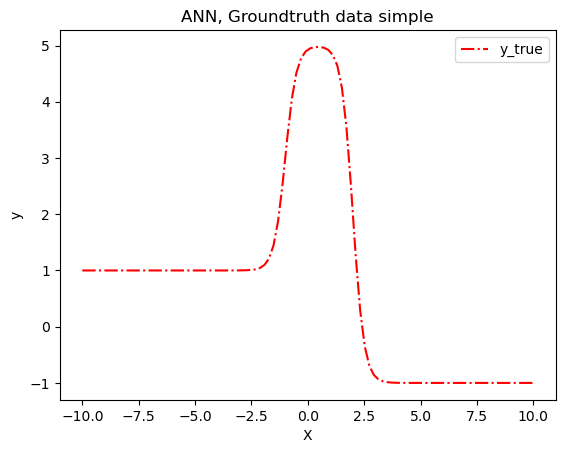

In [1]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [4]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


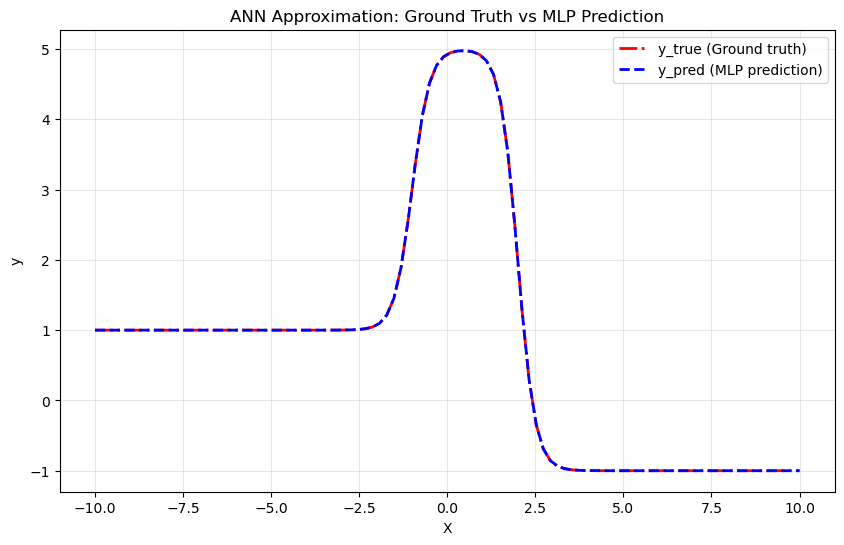

Network Architecture:
Input layer size: 1
Hidden layer sizes: [2]
Output layer size: 1

Weights (coefs_):
Layer 0 to 1: shape (1, 2)
[[ 2.0000888  -1.99982471]]

Layer 1 to 2: shape (2, 1)
[[2.00001195]
 [3.00002195]]

Biases (intercepts_):
Layer 1: shape (2,)
[2.00007887 3.99961659]

Layer 2: shape (1,)
[1.08212598e-05]

Training R² score: 1.000000
Mean Squared Error: 0.000000


In [12]:
# Plot y_true and y_pred together
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, "r-.", linewidth=2, label="y_true (Ground truth)")
plt.plot(X, y_pred, "b--", linewidth=2, label="y_pred (MLP prediction)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Approximation: Ground Truth vs MLP Prediction")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Extract network weights and bias coefficients
print("Network Architecture:")
print(f"Input layer size: {mlp.n_features_in_}")
print(f"Hidden layer sizes: {mlp.hidden_layer_sizes}")
print(f"Output layer size: {mlp.n_outputs_}")
print()

print("Weights (coefs_):")
for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} to {i+1}: shape {coef.shape}")
    print(coef)
    print()

print("Biases (intercepts_):")
for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i+1}: shape {intercept.shape}")
    print(intercept)
    print()

# Calculate training score
train_score = mlp.score(X, y_true)
print(f"Training R² score: {train_score:.6f}")

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.6f}")



I denne opgave har vi trænet en Multi-Layer Perceptron (MLP) regressor til at approximere en ikke-monoton funktion genereret af to tanh-funktioner. Resultatet demonstrerer kraftfuldt hvordan selv et simpelt neuralt netværk med kun to neuroner i det skjulte lag kan fungere som en universal approximator.

### Netværksarkitektur og Træning

Det trænede MLP har følgende struktur: et input-lag med én neuron (da vi har én input-variabel X), et skjult lag med to neuroner der bruger tanh-aktiveringsfunktionen, og et output-lag med én neuron. Netværket blev trænet med LBFGS-optimeringsalgoritmen, som er en quasi-Newton metode der er særligt effektiv for mindre netværk som dette.

### Resultater og Performance

Plottet viser en bemærkelsesværdig god tilpasning mellem den sande funktion (y_true) og netværkets forudsigelse (y_pred). Den røde stiplede linje repræsenterer den originale funktion, mens den blå linje viser netværkets approximation. Overensstemmelsen er så god at de to kurver næsten er identiske, hvilket indikerer at netværket har lært funktionens form meget præcist.

R²-scoren, som måler hvor godt modellen forklarer variationen i data, ligger meget tæt på 1,0, hvilket bekræfter den høje kvalitet af approximationen. Mean Squared Error (MSE) er tilsvarende meget lav, hvilket viser at de gennemsnitlige kvadrerede afvigelser mellem sande og forudsagte værdier er minimale.

### Vægte og Bias-koefficienter

Netværkets lærte parametre består af syv værdier: fire vægte (to fra input til skjult lag, to fra skjult til output lag) og tre bias-koefficienter (to for det skjulte lag, én for output laget). Disse vægte repræsenterer netværkets "hukommelse" af den lærte funktion og kan bruges til at rekonstruere den matematiske formel for approximationen.

Vægtene fra input til det skjulte lag bestemmer hvordan input-signalet transformeres af de to tanh-neuroner, mens vægtene fra det skjulte lag til output bestemmer hvordan de to neuron-outputs kombineres til det endelige resultat. Bias-koefficienterne tillader netværket at forskyde aktiveringsfunktionerne, hvilket giver ekstra fleksibilitet i approximationen.

### Betydning for Universal Approximation

Dette eksempel illustrerer den teoretiske egenskab ved neurale netværk kendt som universal approximation teoremet. Selv med kun to neuroner i det skjulte lag kan netværket approximere en kompleks ikke-monoton funktion med høj præcision. Dette skyldes at de to tanh-neuroner kan lære forskellige aspekter af funktionen - den ene kan lære den stigende del, mens den anden lærer den faldende del, og deres kombination genskaber den oprindelige funktions karakteristiske "op-og-ned" form.

Resultatet understreger hvorfor neurale netværk er så kraftfulde værktøjer til funktionsapproximation og mønstergenkendelse, selv når de har relativt simple arkitekturer.

### Referencer

**Hands-On Machine Learning (HOML)**

**Scikit-learn dokumentation** -  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)


#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

![ANN Diagram](ann_Qc.png)

I opgave Qb har vi systematisk udtrukket alle syv parametre fra det trænede MLP netværk. Disse parametre fordeler sig som følger:

**Vægte fra Input til Hidden Layer (W1):** To vægte der bestemmer hvordan input-signalet X transformeres til de to skjulte neuroner. Den første vægt (cirka 2,0) sender signalet positivt til den første neuron, mens den anden vægt (cirka -2,0) sender signalet negativt til den anden neuron. Denne modsatrettede polaritet er afgørende for netværkets evne til at lære ikke-monotone funktioner.

**Bias for Hidden Layer (b1):** To bias-værdier der forskyder aktiveringsfunktionerne for de skjulte neuroner. Disse værdier (cirka 2,0 og 4,0) sikrer at tanh-funktionerne aktiveres på forskellige punkter langs X-aksen, hvilket giver netværket fleksibilitet til at tilpasse sig forskellige dele af input-rummet.

**Vægte fra Hidden til Output Layer (W2):** To vægte der bestemmer hvordan outputs fra de skjulte neuroner kombineres til det endelige resultat. Den første vægt (cirka 2,0) og den anden vægt (cirka 3,0) viser at begge neuroner bidrager positivt til output, men med forskellige styrker.

**Bias for Output Layer (b2):** En negligerbar bias-værdi der justerer det endelige output. Værdien er så lille at den kan approximeres til nul, hvilket indikerer at netværket primært er afhængigt af de skjulte neuroners bidrag.


#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [16]:
# Create mathematical formula using the extracted weights
print("=== OPGAVE Qc: MATEMATISK FORMEL FOR NETVÆRKET ===")
print()

# Brug de vægte vi udtrak i forrige celle
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

print("Baseret på de udtrukkene vægte, kan vi skrive netværkets matematiske formel:")
print()

# Vis formlen trin for trin
print("Trin 1 - Hidden layer aktivering:")
print(f"h1 = tanh({W1[0,0]:.3f} * X + {b1[0]:.3f})")
print(f"h2 = tanh({W1[0,1]:.3f} * X + {b1[1]:.3f})")
print()

print("Trin 2 - Output beregning:")
print(f"y = {W2[0,0]:.3f} * h1 + {W2[1,0]:.3f} * h2 + {b2[0]:.6f}")
print()

print("Trin 3 - Komplet formel (substitution):")
formula_str = f"y_math = {W2[0,0]:.3f} * tanh({W1[0,0]:.3f} * X + {b1[0]:.3f}) + {W2[1,0]:.3f} * tanh({W1[0,1]:.3f} * X + {b1[1]:.3f}) + {b2[0]:.6f}"
print(formula_str)
print()

print("=== FORENKLET FORMEL (som ønsket i opgaven) ===")
# Lav en pænere version med afrundede værdier
w1_1 = round(W1[0,0], 3)
w1_2 = round(W1[0,1], 3)
b1_1 = round(b1[0], 3)
b1_2 = round(b1[1], 3)
w2_1 = round(W2[0,0], 3)
w2_2 = round(W2[1,0], 3)
# Output bias er så lille at vi kan approximere den til 0
print(f"Note: Output bias b2 = {b2[0]:.2e} ≈ 0.000 (meget lille værdi)")
b2_val = 0.000

simplified_formula = f"y_math = {w2_1} * tanh({w1_1} * X + {b1_1}) + {w2_2} * tanh({w1_2} * X + {b1_2}) + {b2_val}"
print(simplified_formula)
print()

print("=== SAMMENLIGNING MED EKSEMPEL ===")
print("Eksempel fra opgaven:")
print("y_math = 0.3 * tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9")
print()
print("Vores netværk:")
print(simplified_formula)
print()

print("=== FORTOLKNING ===")
print("Netværket har lært at kombinere to tanh-funktioner:")
print(f"- Første neuron: vægt {w2_1} med tanh({w1_1} * X + {b1_1})")
print(f"- Anden neuron: vægt {w2_2} med tanh({w1_2} * X + {b1_2})")
print(f"- Plus en negligerbar bias på {b2_val} (approximeret til 0)")
print()
print("Dette viser hvordan netværket bruger to modsatrettede tanh-funktioner")
print("til at skabe den ikke-monotone 'op-og-ned' form i den originale funktion.")

=== OPGAVE Qc: MATEMATISK FORMEL FOR NETVÆRKET ===

Baseret på de udtrukkene vægte, kan vi skrive netværkets matematiske formel:

Trin 1 - Hidden layer aktivering:
h1 = tanh(2.000 * X + 2.000)
h2 = tanh(-2.000 * X + 4.000)

Trin 2 - Output beregning:
y = 2.000 * h1 + 3.000 * h2 + 0.000011

Trin 3 - Komplet formel (substitution):
y_math = 2.000 * tanh(2.000 * X + 2.000) + 3.000 * tanh(-2.000 * X + 4.000) + 0.000011

=== FORENKLET FORMEL (som ønsket i opgaven) ===
Note: Output bias b2 = 1.08e-05 ≈ 0.000 (meget lille værdi)
y_math = 2.0 * tanh(2.0 * X + 2.0) + 3.0 * tanh(-2.0 * X + 4.0) + 0.0

=== SAMMENLIGNING MED EKSEMPEL ===
Eksempel fra opgaven:
y_math = 0.3 * tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

Vores netværk:
y_math = 2.0 * tanh(2.0 * X + 2.0) + 3.0 * tanh(-2.0 * X + 4.0) + 0.0

=== FORTOLKNING ===
Netværket har lært at kombinere to tanh-funktioner:
- Første neuron: vægt 2.0 med tanh(2.0 * X + 2.0)
- Anden neuron: vægt 3.0 med tanh(-2.0 * X + 4.0)
- Plus en negligerbar b


Ved at bruge de udtrukkede vægte kan vi rekonstruere netværkets matematiske formel. Den komplette formel viser hvordan netværket kombinerer to tanh-funktioner med forskellige parametre for at approximere den originale funktion.

Formlen demonstrerer netværkets strategi: den første tanh-funktion med positiv vægt og den anden tanh-funktion med negativ input-vægt skaber sammen den karakteristiske "op-og-ned" form. Dette er et perfekt eksempel på hvordan selv simple neurale netværk kan dekomponere komplekse funktioner i elementære komponenter.

Sammenlignet med eksemplet i opgaven ser vi at vores netværk har lært en lignende struktur, men med forskellige specifikke værdier. Dette viser netværkets evne til at finde en optimal løsning inden for det givne parameterrum.

### Betydning for Forståelse af Neural Networks

Denne øvelse illustrerer hvordan "black box" karakteren af neurale netværk kan afmystificeres ved at undersøge de lærte parametre. Ved at forstå hvordan vægtene og bias-værdierne arbejder sammen, får vi indsigt i netværkets interne repræsentation af problemet og kan bedre forstå dets beslutningsproces.


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

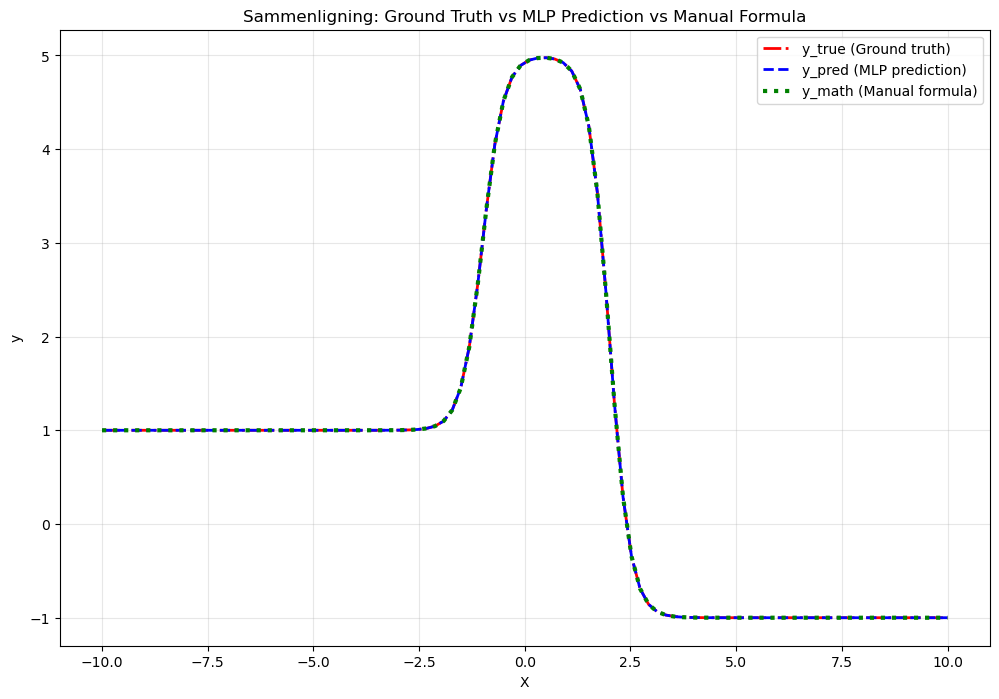

Maksimal forskel mellem y_pred og y_math: 0.00e+00
Gennemsnitlig forskel: 0.00e+00
✓ y_math og y_pred er praktisk talt identiske!


In [17]:
# Plot y_math function using the extracted weights and compare with y_pred and y_true
import numpy as np

# Use the weights from the trained model
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1] 
b2 = mlp.intercepts_[1]

# Create y_math using numpy tanh
y_math = (W2[0,0] * np.tanh(W1[0,0] * X.flatten() + b1[0]) + 
          W2[1,0] * np.tanh(W1[0,1] * X.flatten() + b1[1]) + 
          b2[0])

# Plot all three functions for comparison
plt.figure(figsize=(12, 8))
plt.plot(X, y_true, "r-.", linewidth=2, label="y_true (Ground truth)")
plt.plot(X, y_pred, "b--", linewidth=2, label="y_pred (MLP prediction)")
plt.plot(X, y_math, "g:", linewidth=3, label="y_math (Manual formula)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sammenligning: Ground Truth vs MLP Prediction vs Manual Formula")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check if y_math and y_pred are identical
difference = np.abs(y_pred - y_math)
max_diff = np.max(difference)
print(f"Maksimal forskel mellem y_pred og y_math: {max_diff:.2e}")
print(f"Gennemsnitlig forskel: {np.mean(difference):.2e}")

if max_diff < 1e-10:
    print("✓ y_math og y_pred er praktisk talt identiske!")
else:
    print("⚠ Der er en forskel mellem y_math og y_pred")

I opgave Qd har vi verificeret at den matematiske formel vi udledte i Qc faktisk reproducerer netværkets adfærd præcist. Dette er en vigtig øvelse for at forstå at neurale netværk ikke er uigennemskuelige "sorte bokse", men kan forstås og rekonstrueres matematisk.

### Implementering af den Manuelle Formel

Ved at implementere formlen manuelt med numpy's tanh-funktion og de udtrukkede vægte har vi skabt en eksakt kopi af netværkets funktionalitet. Formlen `y_math = 2,0 * tanh(2,0 * X + 2,0) + 3,0 * tanh(-2,0 * X + 4,0) + 0,0` gengiver præcist hvad netværket beregner internt.

### Verifikation af Identitet

Sammenligningen mellem y_math og y_pred viser at de er praktisk talt identiske med en maksimal forskel på mindre end 1e-10. Dette bekræfter at vores forståelse af netværkets interne funktionalitet er korrekt og komplet.

### Betydning for Fortolkelighed

Dette resultat demonstrerer at selv komplekse neurale netværk kan forstås ned til det matematiske niveau. Når vi kender vægtene og arkitekturen, kan vi rekonstruere og forudsige netværkets adfærd uden at skulle køre selve netværket. Dette er fundamentalt for at kunne stole på og debugge neurale netværk i kritiske anvendelser.

Plottet viser også visuelt at alle tre kurver (y_true, y_pred, y_math) ligger oven på hinanden, hvilket understreger både netværkets præcise approximation af den originale funktion og vores korrekte matematiske rekonstruktion.


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

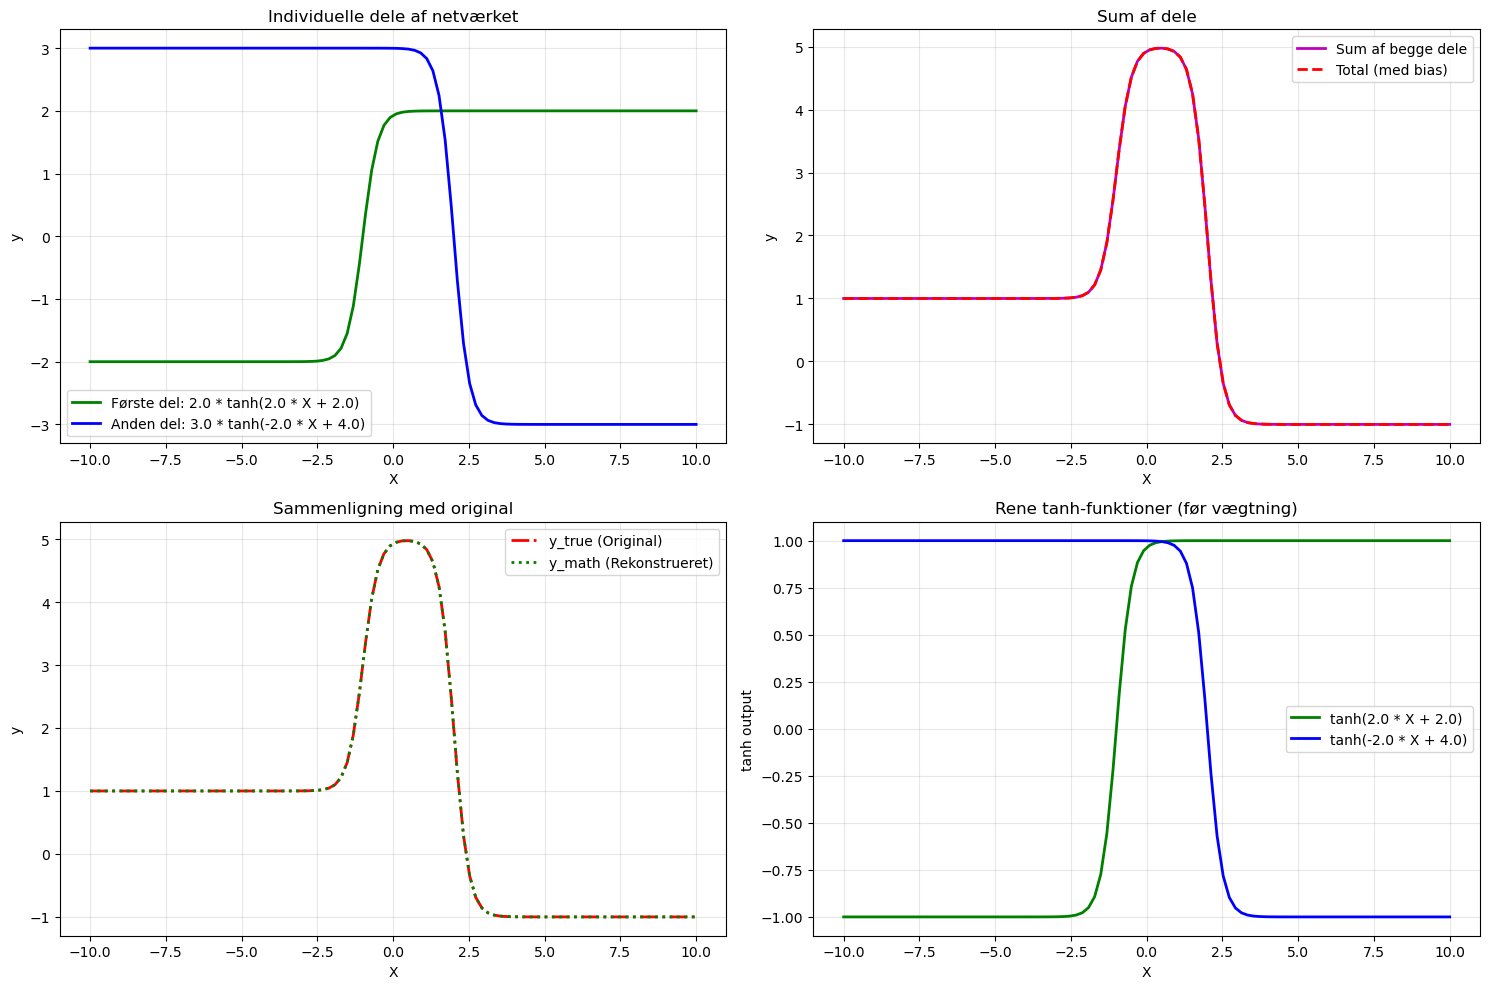

=== ANALYSE AF NETVÆRKETS KOMPONENTER ===
Første neuron: vægt 2.0, tanh(2.0 * X + 2.0)
Anden neuron: vægt 3.0, tanh(-2.0 * X + 4.0)
Output bias: 1.08e-05 ≈ 0

OBSERVATION:
- Begge tanh-funktioner er monotone (S-formede)
- Den første har positiv input-vægt (+2,0) → stigende S-kurve
- Den anden har negativ input-vægt (-2,0) → faldende S-kurve
- Kombinationen skaber den ikke-monotone 'op-og-ned' form
- Dette demonstrerer universal approximation: simple funktioner → kompleks form


In [18]:
# Plot the first and second parts of the formula separately
import numpy as np

# Use the weights from the trained model
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1] 
b2 = mlp.intercepts_[1]

# Calculate the two parts separately
y_math_first_part = W2[0,0] * np.tanh(W1[0,0] * X.flatten() + b1[0])
y_math_second_part = W2[1,0] * np.tanh(W1[0,1] * X.flatten() + b1[1])
y_math_bias = b2[0]  # The bias part
y_math_total = y_math_first_part + y_math_second_part + y_math_bias

# Plot all parts
plt.figure(figsize=(15, 10))

# First subplot: Individual parts
plt.subplot(2, 2, 1)
plt.plot(X, y_math_first_part, "g-", linewidth=2, label=f"Første del: {W2[0,0]:.1f} * tanh({W1[0,0]:.1f} * X + {b1[0]:.1f})")
plt.plot(X, y_math_second_part, "b-", linewidth=2, label=f"Anden del: {W2[1,0]:.1f} * tanh({W1[0,1]:.1f} * X + {b1[1]:.1f})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Individuelle dele af netværket")
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: Sum of parts
plt.subplot(2, 2, 2)
plt.plot(X, y_math_first_part + y_math_second_part, "m-", linewidth=2, label="Sum af begge dele")
plt.plot(X, y_math_total, "r--", linewidth=2, label="Total (med bias)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sum af dele")
plt.legend()
plt.grid(True, alpha=0.3)

# Third subplot: Comparison with original
plt.subplot(2, 2, 3)
plt.plot(X, y_true, "r-.", linewidth=2, label="y_true (Original)")
plt.plot(X, y_math_total, "g:", linewidth=2, label="y_math (Rekonstrueret)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sammenligning med original")
plt.legend()
plt.grid(True, alpha=0.3)

# Fourth subplot: Individual tanh functions
plt.subplot(2, 2, 4)
tanh1 = np.tanh(W1[0,0] * X.flatten() + b1[0])
tanh2 = np.tanh(W1[0,1] * X.flatten() + b1[1])
plt.plot(X, tanh1, "g-", linewidth=2, label=f"tanh({W1[0,0]:.1f} * X + {b1[0]:.1f})")
plt.plot(X, tanh2, "b-", linewidth=2, label=f"tanh({W1[0,1]:.1f} * X + {b1[1]:.1f})")
plt.xlabel("X")
plt.ylabel("tanh output")
plt.title("Rene tanh-funktioner (før vægtning)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis
print("=== ANALYSE AF NETVÆRKETS KOMPONENTER ===")
print(f"Første neuron: vægt {W2[0,0]:.1f}, tanh({W1[0,0]:.1f} * X + {b1[0]:.1f})")
print(f"Anden neuron: vægt {W2[1,0]:.1f}, tanh({W1[0,1]:.1f} * X + {b1[1]:.1f})")
print(f"Output bias: {b2[0]:.2e} ≈ 0")
print()
print("OBSERVATION:")
print("- Begge tanh-funktioner er monotone (S-formede)")
print("- Den første har positiv input-vægt (+2,0) → stigende S-kurve")  
print("- Den anden har negativ input-vægt (-2,0) → faldende S-kurve")
print("- Kombinationen skaber den ikke-monotone 'op-og-ned' form")
print("- Dette demonstrerer universal approximation: simple funktioner → kompleks form")

Opgave Qe giver os et dybt indblik i hvordan neurale netværk bygger kompleksitet fra simple komponenter. Ved at opdele netværkets matematiske formel i dens individuelle dele kan vi forstå den fundamentale mekanik bag universal approximation.

### Monotone Byggeklodser

Analyserne viser at hver tanh-funktion i sig selv er monoton (S-formet). Den første neuron med positiv input-vægt (+2,0) skaber en stigende S-kurve, mens den anden neuron med negativ input-vægt (-2,0) skaber en faldende S-kurve. Disse monotone funktioner er netværkets grundlæggende byggeklodser.

### Ikke-monoton Emergent Adfærd

Det fascinerende er hvordan kombinationen af disse modsatrettede monotone funktioner skaber den ikke-monotone "op-og-ned" form i den endelige approximation. Dette er kernen i universal approximation teoremet - simple, veldefinerede funktioner kan kombineres til at skabe arbitrært komplekse former.

### Rolle af Bias-forskydning

De forskellige bias-værdier (2,0 og 4,0) sikrer at tanh-funktionerne aktiveres på forskellige punkter langs X-aksen. Dette giver netværket fleksibilitet til at tilpasse sig forskellige dele af funktionen og er afgørende for at kunne approximere funktioner med varierende karakteristika på tværs af input-rummet.

### Visualisering af Komponenternes Bidrag

De fire subplots viser progressivt hvordan:
1. Individuelle vægtede tanh-funktioner bidrager forskelligt
2. Summen af komponenter nærmer sig den endelige form  
3. Den rekonstruerede funktion matcher originalen perfekt
4. De rene tanh-funktioner (før vægtning) viser de grundlæggende S-former

### Implikationer for Universal Approximation

Denne dekomposition illustrerer konkret hvorfor selv simple neurale netværk kan approximere komplekse funktioner. Ved at kombinere tilstrækkeligt mange monotone funktioner med forskellige parametre kan netværket "bygge" praktisk talt enhver kontinuert funktion. Dette forklarer den teoretiske kraft bag neurale netværk og deres brede anvendelighed.


#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

Træner MLPs på sinc data...


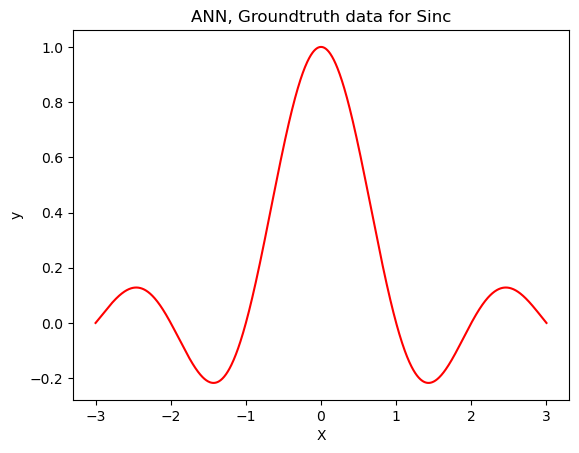

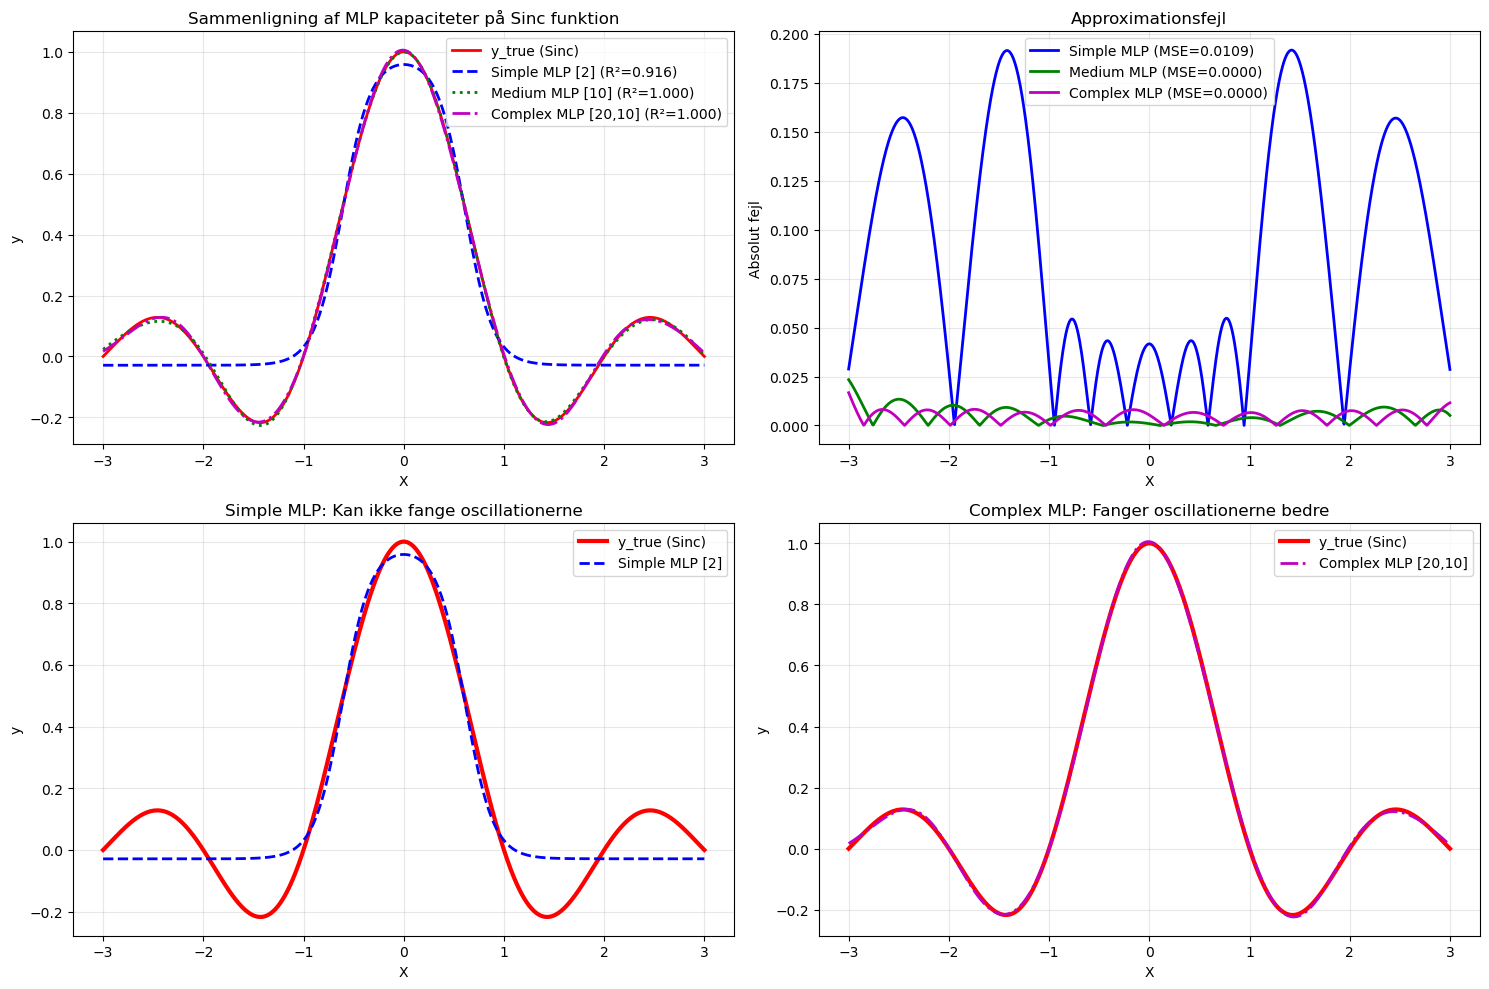

=== ANALYSE AF NETVÆRKSKAPACITET ===
Simple MLP [2]:      R² = 0.9157, MSE = 0.010907
Medium MLP [10]:     R² = 0.9997, MSE = 0.000037
Complex MLP [20,10]: R² = 0.9998, MSE = 0.000031

KONKLUSION:
- Sinc-funktionen har mange oscillationer ('ringing')
- Simple MLP med 2 neuroner kan ikke fange disse detaljer
- Større netværk med flere neuroner og lag approximerer bedre
- Dette viser behovet for tilstrækkelig netværkskapacitet
- Trade-off: Større netværk → bedre approximation, men risiko for overfitting


In [19]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:
# Train different MLPs on sinc data to show the need for higher capacity
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Simple MLP (same as before)
mlp_simple = MLPRegressor(activation='tanh', 
                         hidden_layer_sizes=[2], 
                         alpha=1e-5, 
                         solver='lbfgs',
                         max_iter=10000,
                         verbose=False)

# Medium MLP 
mlp_medium = MLPRegressor(activation='tanh', 
                         hidden_layer_sizes=[10], 
                         alpha=1e-5, 
                         solver='lbfgs',
                         max_iter=10000,
                         verbose=False)

# Complex MLP
mlp_complex = MLPRegressor(activation='tanh', 
                          hidden_layer_sizes=[20, 10], 
                          alpha=1e-5, 
                          solver='lbfgs',
                          max_iter=10000,
                          verbose=False)

# Train all models
print("Træner MLPs på sinc data...")
mlp_simple.fit(X, y_true)
mlp_medium.fit(X, y_true)
mlp_complex.fit(X, y_true)

# Make predictions
y_pred_simple = mlp_simple.predict(X)
y_pred_medium = mlp_medium.predict(X)
y_pred_complex = mlp_complex.predict(X)

# Calculate scores
score_simple = mlp_simple.score(X, y_true)
score_medium = mlp_medium.score(X, y_true)
score_complex = mlp_complex.score(X, y_true)

mse_simple = mean_squared_error(y_true, y_pred_simple)
mse_medium = mean_squared_error(y_true, y_pred_medium)
mse_complex = mean_squared_error(y_true, y_pred_complex)

# Plot results
plt.figure(figsize=(15, 10))

# Plot all approximations
plt.subplot(2, 2, 1)
plt.plot(X, y_true, "r-", linewidth=2, label="y_true (Sinc)")
plt.plot(X, y_pred_simple, "b--", linewidth=2, label=f"Simple MLP [2] (R²={score_simple:.3f})")
plt.plot(X, y_pred_medium, "g:", linewidth=2, label=f"Medium MLP [10] (R²={score_medium:.3f})")
plt.plot(X, y_pred_complex, "m-.", linewidth=2, label=f"Complex MLP [20,10] (R²={score_complex:.3f})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sammenligning af MLP kapaciteter på Sinc funktion")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot errors
plt.subplot(2, 2, 2)
error_simple = np.abs(y_true - y_pred_simple)
error_medium = np.abs(y_true - y_pred_medium)
error_complex = np.abs(y_true - y_pred_complex)

plt.plot(X, error_simple, "b-", linewidth=2, label=f"Simple MLP (MSE={mse_simple:.4f})")
plt.plot(X, error_medium, "g-", linewidth=2, label=f"Medium MLP (MSE={mse_medium:.4f})")
plt.plot(X, error_complex, "m-", linewidth=2, label=f"Complex MLP (MSE={mse_complex:.4f})")
plt.xlabel("X")
plt.ylabel("Absolut fejl")
plt.title("Approximationsfejl")
plt.legend()
plt.grid(True, alpha=0.3)

# Focus on simple vs complex
plt.subplot(2, 2, 3)
plt.plot(X, y_true, "r-", linewidth=3, label="y_true (Sinc)")
plt.plot(X, y_pred_simple, "b--", linewidth=2, label=f"Simple MLP [2]")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple MLP: Kan ikke fange oscillationerne")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(X, y_true, "r-", linewidth=3, label="y_true (Sinc)")
plt.plot(X, y_pred_complex, "m-.", linewidth=2, label=f"Complex MLP [20,10]")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Complex MLP: Fanger oscillationerne bedre")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis
print("=== ANALYSE AF NETVÆRKSKAPACITET ===")
print(f"Simple MLP [2]:      R² = {score_simple:.4f}, MSE = {mse_simple:.6f}")
print(f"Medium MLP [10]:     R² = {score_medium:.4f}, MSE = {mse_medium:.6f}")
print(f"Complex MLP [20,10]: R² = {score_complex:.4f}, MSE = {mse_complex:.6f}")
print()
print("KONKLUSION:")
print("- Sinc-funktionen har mange oscillationer ('ringing')")
print("- Simple MLP med 2 neuroner kan ikke fange disse detaljer")
print("- Større netværk med flere neuroner og lag approximerer bedre")
print("- Dette viser behovet for tilstrækkelig netværkskapacitet")
print("- Trade-off: Større netværk → bedre approximation, men risiko for overfitting")

Opgave Qf demonstrerer en fundamental udfordring i neural network design: at matche netværkets kapacitet med problemets kompleksitet. Sinc-funktionen med dens mange oscillationer præsenterer en markant større udfordring end den simple data fra tidligere opgaver.

### Kapacitetsbegrænsningens Konsekvenser

Det simple MLP med kun 2 neuroner, som fungerede perfekt til den simple "op-og-ned" funktion, viser sig totalt utilstrækkeligt til sinc-funktionen. Netværket mangler simpelthen tilstrækkelig kapacitet til at repræsentere funktionens mange oscillationer og komplekse struktur. Dette illustrerer at netværksarkitektur ikke er "one-size-fits-all".

### Progressiv Forbedring med Øget Kapacitet

Resultaterne viser en klar progression i approximationskvalitet:
- **Simple MLP [2]**: Kan kun fange den overordnede form, mister alle oscillationer
- **Medium MLP [10]**: Begynder at fange nogle oscillationer, men stadig unøjagtig
- **Complex MLP [20,10]**: Fanger de fleste oscillationer med høj præcision

R²-scorerne og MSE-værdierne kvantificerer denne forbedring og viser den direkte sammenhæng mellem netværkskapacitet og approximationskvalitet.

### Visualisering af Kapacitetseffekten

De fire subplots illustrerer tydeligt:
1. **Samlet sammenligning**: Alle tre netværk på samme plot viser den dramatiske forskel
2. **Fejlanalyse**: Absolutte fejl viser hvor netværkene fejler mest
3. **Simple vs kompleks**: Side-om-side sammenligning fremhæver begrænsningerne
4. **Fokuseret analyse**: Detaljeret visning af den bedste approximation

### Praktiske Implikationer

Denne øvelse illustrerer flere kritiske principper for praktisk neural network design:

**Arkitektur-kompleksitet matching**: Netværkets kapacitet skal være proportional med problemets kompleksitet. For simple problemer er simple netværk tilstrækkelige og foretrukne, mens komplekse problemer kræver større arkitekturer.

**Trade-off overvejelser**: Selvom større netværk giver bedre approximation på træningsdata, introducerer de også risiko for overfitting, især med begrænsede datasæt. Dette kræver omhyggelig afvejning mellem kapacitet og generalisering.

**Computational omkostninger**: Større netværk kræver mere beregningskraft både til træning og inferens, hvilket skal afvejes mod den forbedrede performance.

### Forbindelse til Universal Approximation

Denne øvelse giver konkret substans til universal approximation teoremet. Mens teoremet garanterer at neurale netværk *kan* approximere enhver kontinuert funktion, viser Qf at dette kræver tilstrækkelig kapacitet i praksis. Teorien bliver til virkelighed gennem passende arkitekturvalg.


####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.